In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


In [2]:
data1 = pd.read_csv('data1.csv', sep=';')
data2 = pd.read_csv('data2.csv', sep=';')
data3 = pd.read_csv('data3.csv', sep=';')

In [3]:
print(data1.head())
print(data2.head())
print(data3.head())

    ID     RegDate RegCountry RegSource
0  721  2016-01-01          B        SE
1  722  2016-01-01          A        SE
2  723  2016-01-01          A        SE
3  724  2016-01-01          A        SE
4  841  2016-01-01          A        SE
    ID     DepDate               Sum PaymInstr
0  620  2016-01-03  3,06849682010272     Other
1  620  2016-01-03  3,94521019727492     Other
2  620  2016-01-03  4,20822421042658     Other
3  620  2016-01-02  2,63014013151662     Other
4  620  2016-01-02  1,75342675434441     Other
       ID    GameDate  GameHour             SumRevA            SumRevB
0    7315  2016-05-24         7  0,0191815856777494                  0
1  154563  2016-12-23        20    17,3337595907928  -15,3388746803069
2   37537  2016-09-19        18  0,0191815856777494                  0
3    4629  2016-02-25        18                   0                  0
4    4583  2016-02-12         3    9,64194373401535                  0


In [4]:
data1['RegDate'] = pd.to_datetime(data1['RegDate'])
data2['DepDate'] = pd.to_datetime(data2['DepDate'])
data3['GameDate'] = pd.to_datetime(data3['GameDate'])

data2['Sum'] = data2['Sum'].apply(lambda x: float(x.replace(',', '.')))
data3['SumRevA'] = data3['SumRevA'].apply(lambda x: float(x.replace(',', '.')))
data3['SumRevB'] = data3['SumRevB'].apply(lambda x: float(x.replace(',', '.')))

In [5]:
data2['DepMonth'] = data2['DepDate'].dt.strftime('%Y-%m')
data1['RegMonth'] = data1['RegDate'].dt.strftime('%Y-%m')


In [83]:
data3_rev = data3.groupby('ID', as_index=False).agg({'SumRevA': 'sum', 'SumRevB': 'sum'})
data3_rev

,ID,SumRevA,SumRevB
0,8,0.537084,0.000000
1,9,9.680307,6.476982
2,17,23.887468,0.000000
3,22,1.406650,0.000000
4,31,30.939898,0.000000
...,...,...,...
37468,376874,23.107417,0.000000
37469,376885,1.285166,0.000000
37470,376890,0.901535,0.000000
37471,376891,0.639386,0.000000


In [84]:
data2_sum = data2.groupby(['ID', 'DepMonth'], as_index=False)['Sum'].sum()
data2_sum

,ID,DepMonth,Sum
0,8,2016-01,2.191783
1,9,2016-01,18.410981
2,17,2016-01,135.089904
3,31,2016-04,14.039378
4,31,2016-10,15.357579
...,...,...,...
39114,376874,2016-12,6.393862
39115,376874,2017-01,12.787724
39116,376885,2016-12,4.359635
39117,376890,2016-12,5.099704


In [13]:
def get_cashback(x):
    if x <= 100:
        x *= 0.05
    elif 100 < x <= 1000:
        x *= 0.1
    elif 1000 < x <= 10000:
        x *= 0.15
    else: 
        x *= 0.2   
    return x


In [45]:
data2_sum['cashback'] = data2_sum['Sum'].apply(get_cashback)
data2_sum


,ID,DepMonth,Sum,cashback
0,8,2016-01,2.191783,0.109589
1,9,2016-01,18.410981,0.920549
2,17,2016-01,135.089904,13.508990
3,31,2016-04,14.039378,0.701969
4,31,2016-10,15.357579,0.767879
...,...,...,...,...
39114,376874,2016-12,6.393862,0.319693
39115,376874,2017-01,12.787724,0.639386
39116,376885,2016-12,4.359635,0.217982
39117,376890,2016-12,5.099704,0.254985


In [47]:
total_user_cashback = data2_sum.groupby('ID', as_index=False).agg({'Sum': 'sum', 'cashback': 'sum'})
total_user_cashback

<ipython-input-47-e53980cc9876>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_user_cashback = data2_sum.groupby('ID', as_index=False)['Sum','cashback'].sum()


,ID,Sum,cashback
0,8,2.191783,0.109589
1,9,18.410981,0.920549
2,17,135.089904,13.508990
3,31,44.520431,2.226022
4,32,2.250548,0.112527
...,...,...,...
22697,376861,4.141672,0.207084
22698,376874,19.181586,0.959079
22699,376885,4.359635,0.217982
22700,376890,5.099704,0.254985


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='SumRevB'>

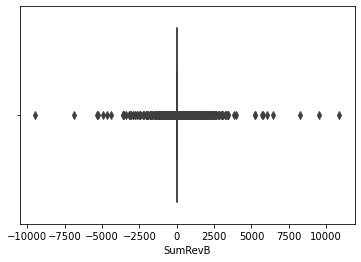

In [129]:
sns.boxplot(data3['SumRevB'])

In [82]:
data = data1.merge(total_user_cashback, how='left', on='ID').merge(data3_rev, how='left', on='ID')
data


,ID,RegDate,RegCountry,RegSource,RegMonth,Sum,cashback,SumRevA,SumRevB
0,721,2016-01-01,B,SE,2016-01,NaN,NaN,NaN,NaN
1,722,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN
2,723,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN
3,724,2016-01-01,A,SE,2016-01,17.690511,0.884526,8.126598,0.0
4,841,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
376897,376755,2016-12-31,A,WM,2016-12,NaN,NaN,NaN,NaN
376898,376756,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN
376899,376757,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN
376900,376758,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN


In [62]:
pd.isna(data['cashback'].iloc[4])

True

In [67]:
data['User_cost'] = (data['cashback'].apply(lambda x: 0 if pd.isna(x) else x) + data['RegSource'].apply(lambda x: 2 if x == 'WM' else 0)).round(2)
data

,ID,RegDate,RegCountry,RegSource,RegMonth,Sum,cashback,SumRevA,SumRevB,User_cost
0,721,2016-01-01,B,SE,2016-01,NaN,NaN,NaN,NaN,0.00
1,722,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN,0.00
2,723,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN,0.00
3,724,2016-01-01,A,SE,2016-01,17.690511,0.884526,8.126598,0.0,0.88
4,841,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
376897,376755,2016-12-31,A,WM,2016-12,NaN,NaN,NaN,NaN,2.00
376898,376756,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN,0.00
376899,376757,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN,0.00
376900,376758,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN,0.00


In [78]:
data

,ID,RegDate,RegCountry,RegSource,RegMonth,Sum,cashback,SumRevA,SumRevB,User_cost
0,721,2016-01-01,B,SE,2016-01,NaN,NaN,NaN,NaN,0.00
1,722,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN,0.00
2,723,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN,0.00
3,724,2016-01-01,A,SE,2016-01,17.690511,0.884526,8.126598,0.0,0.88
4,841,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
376897,376755,2016-12-31,A,WM,2016-12,NaN,NaN,NaN,NaN,2.00
376898,376756,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN,0.00
376899,376757,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN,0.00
376900,376758,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN,0.00


In [76]:
total_costs = data.groupby('RegMonth').agg({'Sum': 'sum', 'SumRevA': 'sum', 'SumRevB': 'sum', 'User_cost': 'sum'}).round(2)
total_costs.rename(columns={'User_cost': 'Total_users_costs'}, inplace=True)
total_costs['Total_costs'] = total_costs['Total_users_costs'] + 100000
total_costs['Total_Revenue'] = total_costs['SumRevA'] + total_costs['SumRevB']
total_costs


,Sum,SumRevA,SumRevB,Total_users_costs,Total_costs,Total_Revenue
RegMonth,,,,,,
2016-01,254783.01,74612.54,31067.41,30768.70,130768.70,105679.95
2016-02,225510.06,97116.27,13060.48,25757.43,125757.43,110176.75
2016-03,155298.48,69018.25,14607.62,16746.45,116746.45,83625.87
2016-04,209461.79,84197.74,19642.09,25629.85,125629.85,103839.83
2016-05,116933.40,34052.71,12900.27,22581.16,122581.16,46952.98
2016-06,283939.50,56983.72,82370.95,44106.56,144106.56,139354.67
2016-07,76725.21,26706.89,10069.32,8195.14,108195.14,36776.21
2016-08,158909.62,40808.43,12023.73,22420.37,122420.37,52832.16
2016-09,184484.77,55347.12,19139.47,47375.50,147375.50,74486.59


In [132]:
no_null_data = data[~data['Sum'].isnull() & ~data['SumRevA'].isnull()]
no_null_data

,ID,RegDate,RegCountry,RegSource,RegMonth,DepMonth,Sum,SumRevA,SumRevB
3,724,2016-01-01,A,SE,2016-01,2016-01,17.690511,8.126598,0.000000
6,843,2016-01-01,A,WM,2016-01,2016-01,9.041055,4.290281,0.000000
24,490,2016-01-01,A,SE,2016-01,2016-01,22.869144,3.523018,0.000000
25,491,2016-01-01,A,WM,2016-01,2016-01,82.262035,33.554987,0.000000
27,493,2016-01-01,A,SE,2016-01,2016-01,7.619482,0.498721,0.000000
...,...,...,...,...,...,...,...,...,...
376870,376376,2016-12-28,A,SE,2016-12,2016-12,4.202431,0.242967,0.000000
376872,376378,2016-12-28,A,SE,2016-12,2016-12,5.480432,0.076726,0.000000
376877,376383,2016-12-29,A,SE,2016-12,2017-01,9.676665,1.521739,0.191816
376885,376391,2016-12-30,A,SE,2016-12,2016-12,25.434325,10.799233,0.000000


In [133]:
# определяем месяц первой покупки для каждого покупателя 
cohorts = no_null_data.groupby('ID', as_index=False)['DepMonth'].min()
cohorts.rename(columns = {'DepMonth': 'Cohort'}, inplace=True)
cohorts

,ID,Cohort
0,8,2016-01
1,9,2016-01
2,17,2016-01
3,31,2016-04
4,32,2016-03
...,...,...
22448,376861,2016-12
22449,376874,2016-12
22450,376885,2016-12
22451,376890,2016-12


In [134]:
# добавим когорты к основным данным
no_null_data = no_null_data.merge(cohorts, how='left', on='ID')
no_null_data

,ID,RegDate,RegCountry,RegSource,RegMonth,DepMonth,Sum,SumRevA,SumRevB,Cohort
0,724,2016-01-01,A,SE,2016-01,2016-01,17.690511,8.126598,0.000000,2016-01
1,843,2016-01-01,A,WM,2016-01,2016-01,9.041055,4.290281,0.000000,2016-01
2,490,2016-01-01,A,SE,2016-01,2016-01,22.869144,3.523018,0.000000,2016-01
3,491,2016-01-01,A,WM,2016-01,2016-01,82.262035,33.554987,0.000000,2016-01
4,493,2016-01-01,A,SE,2016-01,2016-01,7.619482,0.498721,0.000000,2016-01
...,...,...,...,...,...,...,...,...,...,...
22448,376376,2016-12-28,A,SE,2016-12,2016-12,4.202431,0.242967,0.000000,2016-12
22449,376378,2016-12-28,A,SE,2016-12,2016-12,5.480432,0.076726,0.000000,2016-12
22450,376383,2016-12-29,A,SE,2016-12,2017-01,9.676665,1.521739,0.191816,2017-01
22451,376391,2016-12-30,A,SE,2016-12,2016-12,25.434325,10.799233,0.000000,2016-12


In [135]:
no_null_data.groupby('Cohort')['Sum'].sum().round(2)

Cohort
2016-01    203709.38
2016-02    210642.50
2016-03    141824.27
2016-04    224968.31
2016-05    111336.52
2016-06    290241.55
2016-07     80313.12
2016-08    156073.91
2016-09    176673.91
2016-10    250434.16
2016-11    428799.76
2016-12    209939.36
2017-01     26229.31
2017-02      3634.83
Name: Sum, dtype: float64

In [142]:
#создадим функцию которая добавляет столбец с временем жизни каждой когорты
# считаем сколько уникальных клиентов у нас в каждой когорте
def cohort_preiod(no_null_data):
    no_null_data['CohortLT'] = np.arange(len(no_null_data))
    return no_null_data

cohorts = no_null_data.groupby(['Cohort', 'RegMonth'])[['ID']].nunique()
cohorts = cohorts.groupby(level=0).apply(cohort_preiod)
cohorts.head()

ID  CohortLT
Cohort  RegMonth               
2016-01 2016-01   800         0
2016-02 2016-01    83         0
        2016-02   711         1
2016-03 2016-01    26         0
        2016-02    83         1

In [144]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['Cohort', 'CohortLT'], inplace=True)
cohorts = cohorts.rename(columns={'ID': 'TotalUsers'})
cohorts

RegMonth  TotalUsers
Cohort  CohortLT                     
2016-01 0         2016-01         800
2016-02 0         2016-01          83
        1         2016-02         711
2016-03 0         2016-01          26
        1         2016-02          83
...                   ...         ...
2017-02 6         2016-08           3
        7         2016-09          16
        8         2016-10          59
        9         2016-11         105
        10        2016-12          36

[101 rows x 2 columns]

In [157]:
data.head()

,ID,RegDate,RegCountry,RegSource,RegMonth,DepMonth,Sum,SumRevA,SumRevB
0,721,2016-01-01,B,SE,2016-01,NaN,NaN,NaN,NaN
1,722,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN
2,723,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN
3,724,2016-01-01,A,SE,2016-01,2016-01,17.690511,8.126598,0.0
4,841,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN


In [177]:
a = data.groupby(['ID', 'DepMonth'], as_index=False)['Sum'].sum()
a

,ID,DepMonth,Sum
0,8,2016-01,2.191783
1,9,2016-01,18.410981
2,17,2016-01,135.089904
3,31,2016-04,44.520431
4,32,2016-03,2.250548
...,...,...,...
22697,376861,2016-12,4.141672
22698,376874,2016-12,19.181586
22699,376885,2016-12,4.359635
22700,376890,2016-12,5.099704


In [189]:
data

,ID,RegDate,RegCountry,RegSource,RegMonth,DepMonth,Sum,SumRevA,SumRevB
0,721,2016-01-01,B,SE,2016-01,NaN,NaN,NaN,NaN
1,722,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN
2,723,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN
3,724,2016-01-01,A,SE,2016-01,2016-01,17.690511,8.126598,0.0
4,841,2016-01-01,A,SE,2016-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
376897,376755,2016-12-31,A,WM,2016-12,NaN,NaN,NaN,NaN
376898,376756,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN
376899,376757,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN
376900,376758,2016-12-31,A,SE,2016-12,NaN,NaN,NaN,NaN


In [184]:
data1[data1['RegSource'] =='WM']

,ID,RegDate,RegCountry,RegSource,RegMonth
6,843,2016-01-01,A,WM,2016-01
25,491,2016-01-01,A,WM,2016-01
60,122,2016-01-02,A,WM,2016-01
80,9,2016-01-02,A,WM,2016-01
106,2045,2016-01-03,A,WM,2016-01
...,...,...,...,...,...
376889,376395,2016-12-30,A,WM,2016-12
376890,376748,2016-12-30,A,WM,2016-12
376893,376751,2016-12-30,A,WM,2016-12
376896,376754,2016-12-30,A,WM,2016-12
